In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'title': 'Modeling wine preferences by data mining from physicoc

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, linear_model 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
import scipy 
from scipy.stats import pearsonr
import sklearn


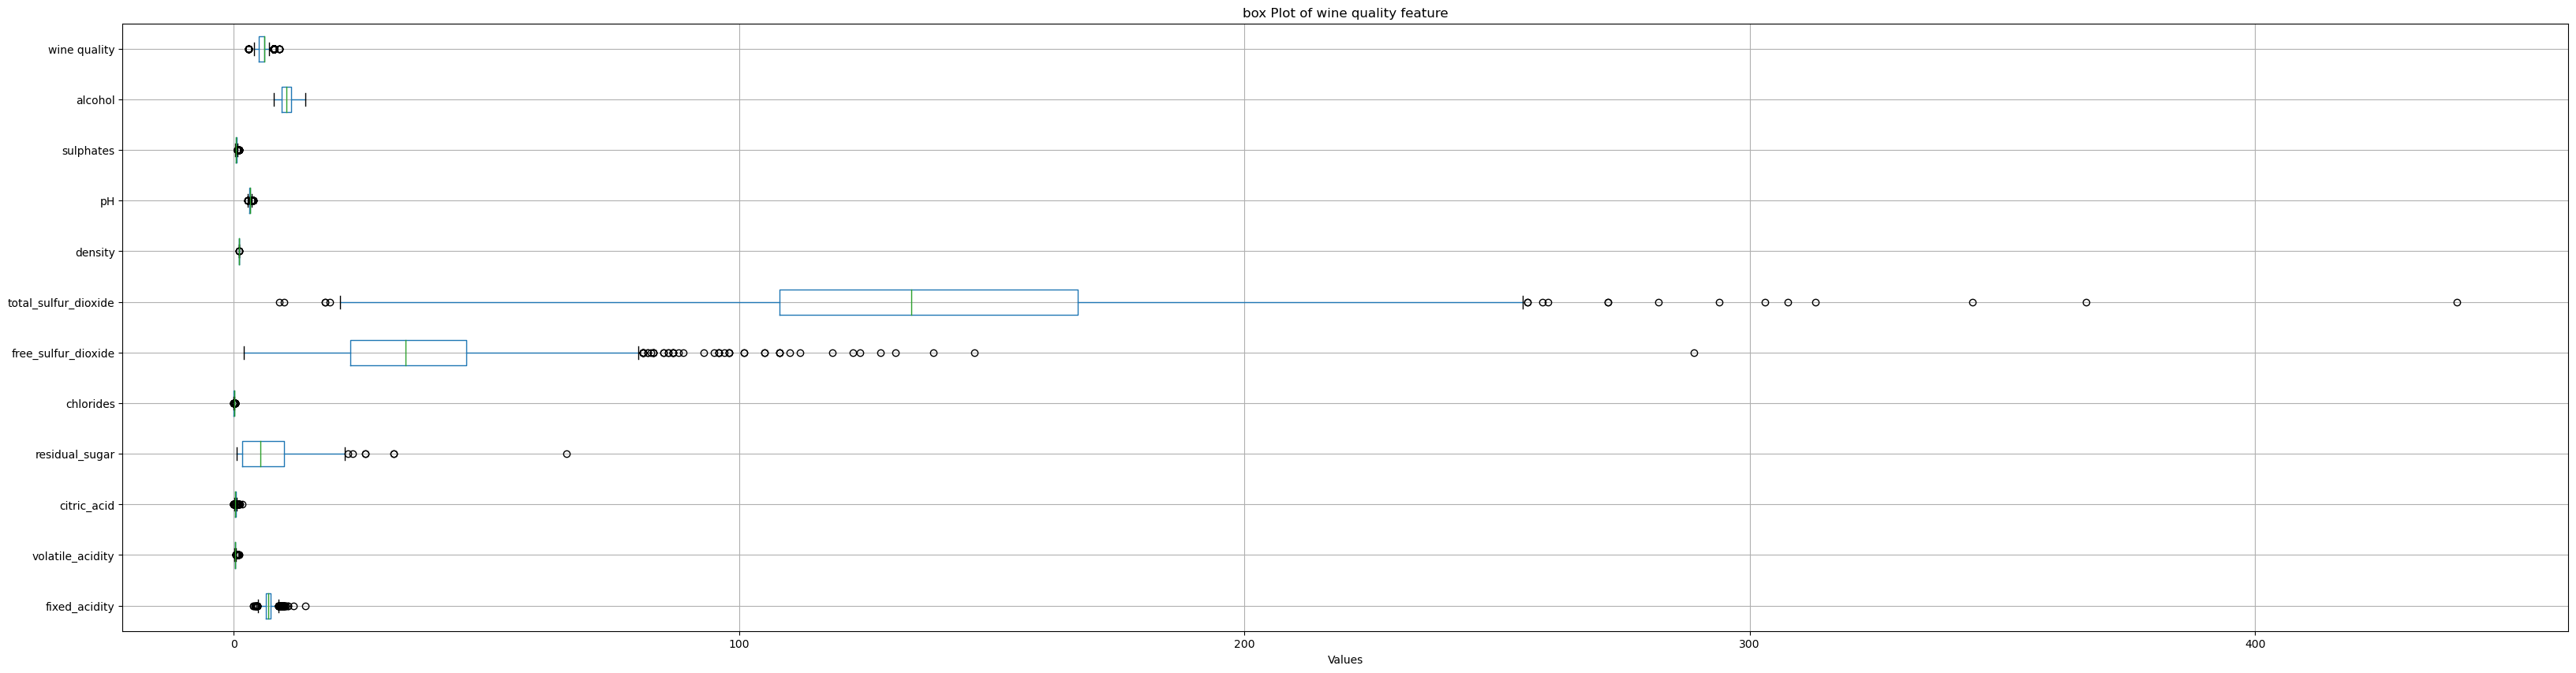

In [20]:
df = pd.DataFrame(X)
df['wine quality'] = y
#Creating a box plot for the features 
plt.figure(figsize = (40 ,10))
df.boxplot( vert  = False)
plt.title ( "box Plot of wine quality feature")
plt.xlabel("Values")
plt.show()

In [41]:
y.value_counts()

quality
6          2198
5          1457
7           880
8           175
4           163
3            20
9             5
dtype: int64

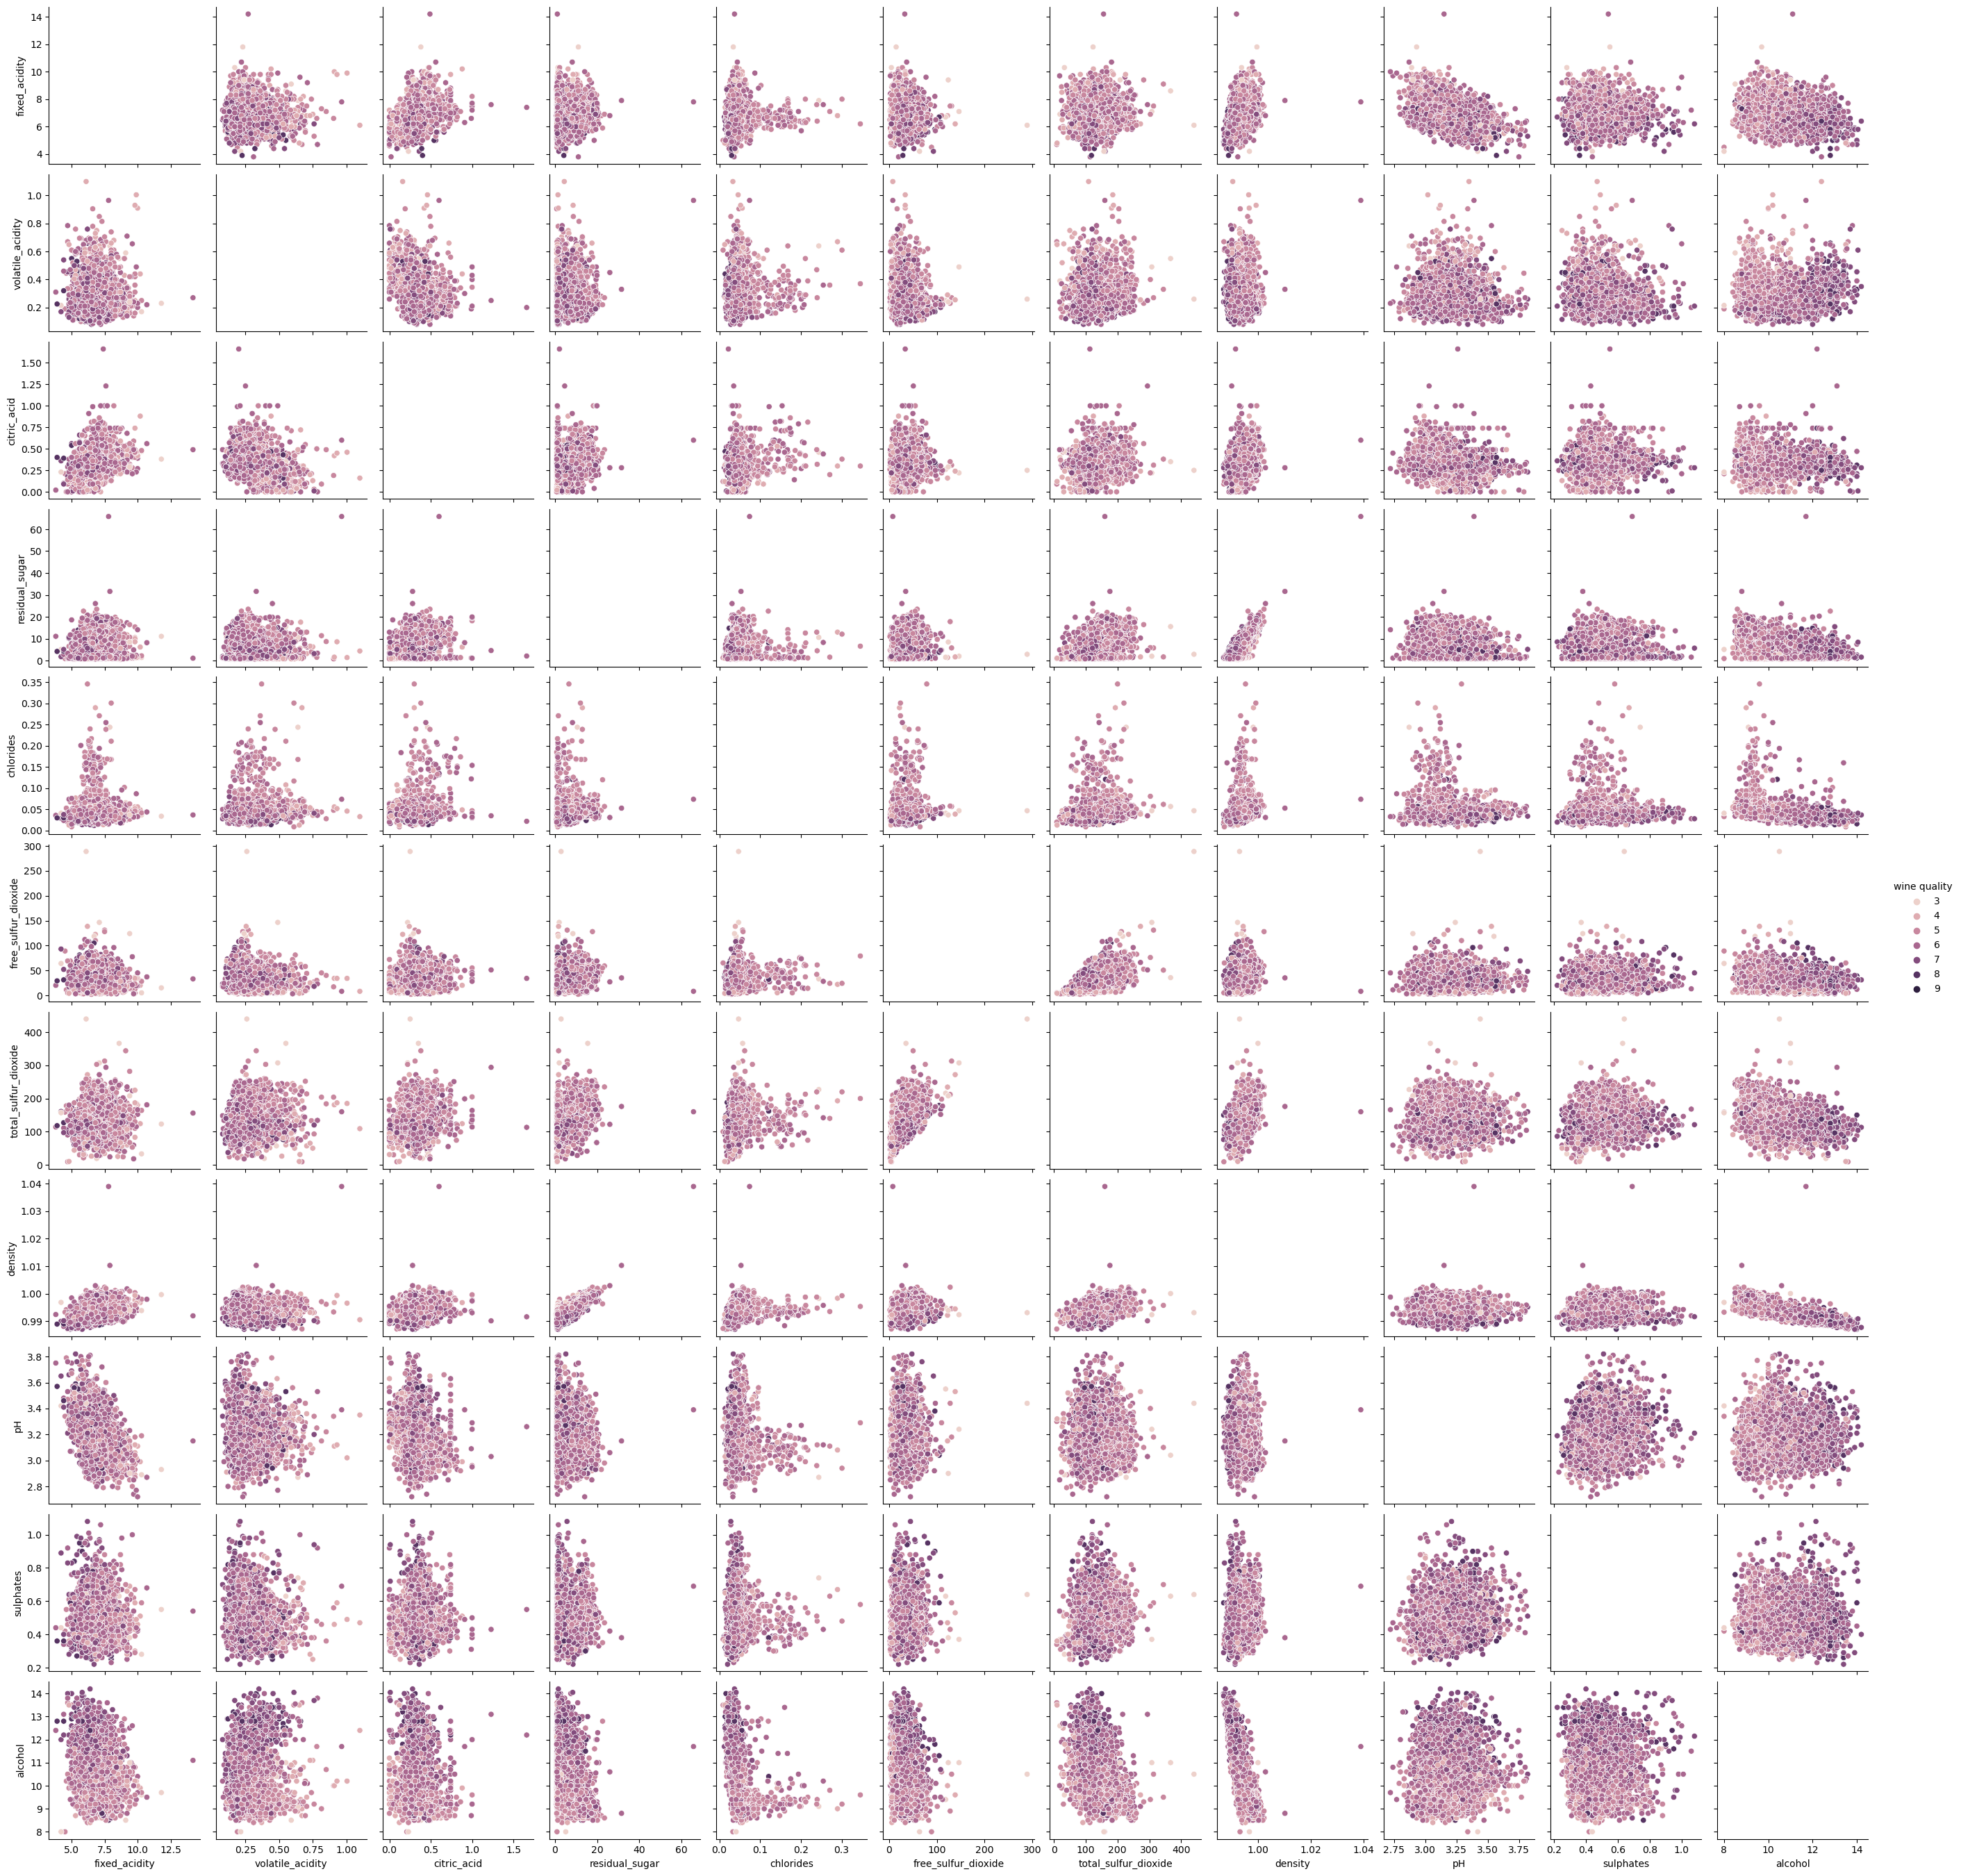

In [23]:
# pairplot to visuablize relationship
sns.pairplot( df , diag_kind = 'Kde' , hue = 'wine quality')

<AxesSubplot:xlabel='wine quality', ylabel='count'>

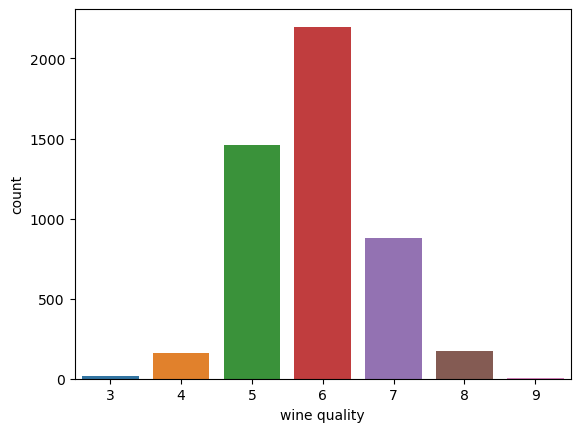

In [25]:
sns.countplot( x = "wine quality" , data = df)

In [28]:
null_counts = df.isnull().sum()
null_counts

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine quality            0
dtype: int64

fixed_acidity              AxesSubplot(0.125,0.798085;0.168478x0.0819149)
volatile_acidity        AxesSubplot(0.327174,0.798085;0.168478x0.0819149)
citric_acid             AxesSubplot(0.529348,0.798085;0.168478x0.0819149)
residual_sugar          AxesSubplot(0.731522,0.798085;0.168478x0.0819149)
chlorides                  AxesSubplot(0.125,0.699787;0.168478x0.0819149)
free_sulfur_dioxide     AxesSubplot(0.327174,0.699787;0.168478x0.0819149)
total_sulfur_dioxide    AxesSubplot(0.529348,0.699787;0.168478x0.0819149)
density                 AxesSubplot(0.731522,0.699787;0.168478x0.0819149)
pH                         AxesSubplot(0.125,0.601489;0.168478x0.0819149)
sulphates               AxesSubplot(0.327174,0.601489;0.168478x0.0819149)
alcohol                 AxesSubplot(0.529348,0.601489;0.168478x0.0819149)
wine quality            AxesSubplot(0.731522,0.601489;0.168478x0.0819149)
dtype: object

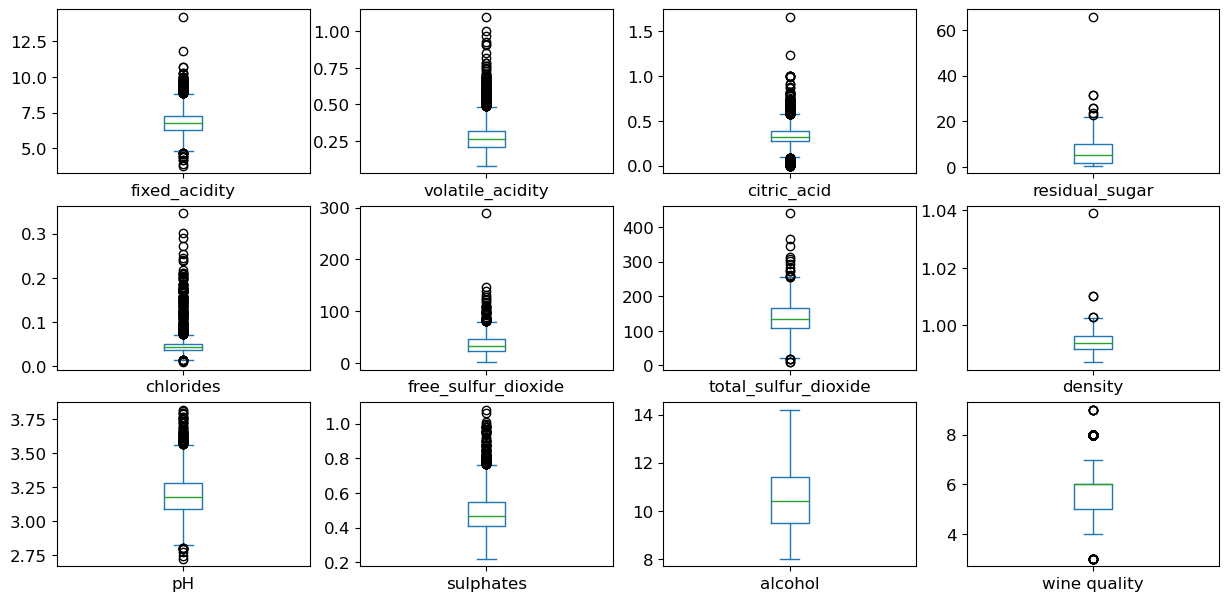

In [30]:
data_mean = df.iloc[:,:]
data_mean.plot( kind = 'box', subplots = True , layout = (8,4), sharex = False , sharey = False , fontsize = 12 , figsize = ( 15,20))

In [31]:
df.describe()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free_sulfur_dioxide  total_sulfur_dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol  wine quality  
count  4898.000000  4898.000000  4898.000000   4898.000000  
mean      3.188267     0.489847    10.514267      5.877909  
std       0.151001     0.114126     1.230621      0.885639  
min       2.720000     0.220000     8.000000      3.000000  
25%       3.090000     0.410000     9.500000      5.000000  
50%       3.180000     0.470000    10.400000      6.000000  
75%       3.280000     0.550000    11.400000      6.000000  
max       3.820000     1.080000    14.200000      9.000000

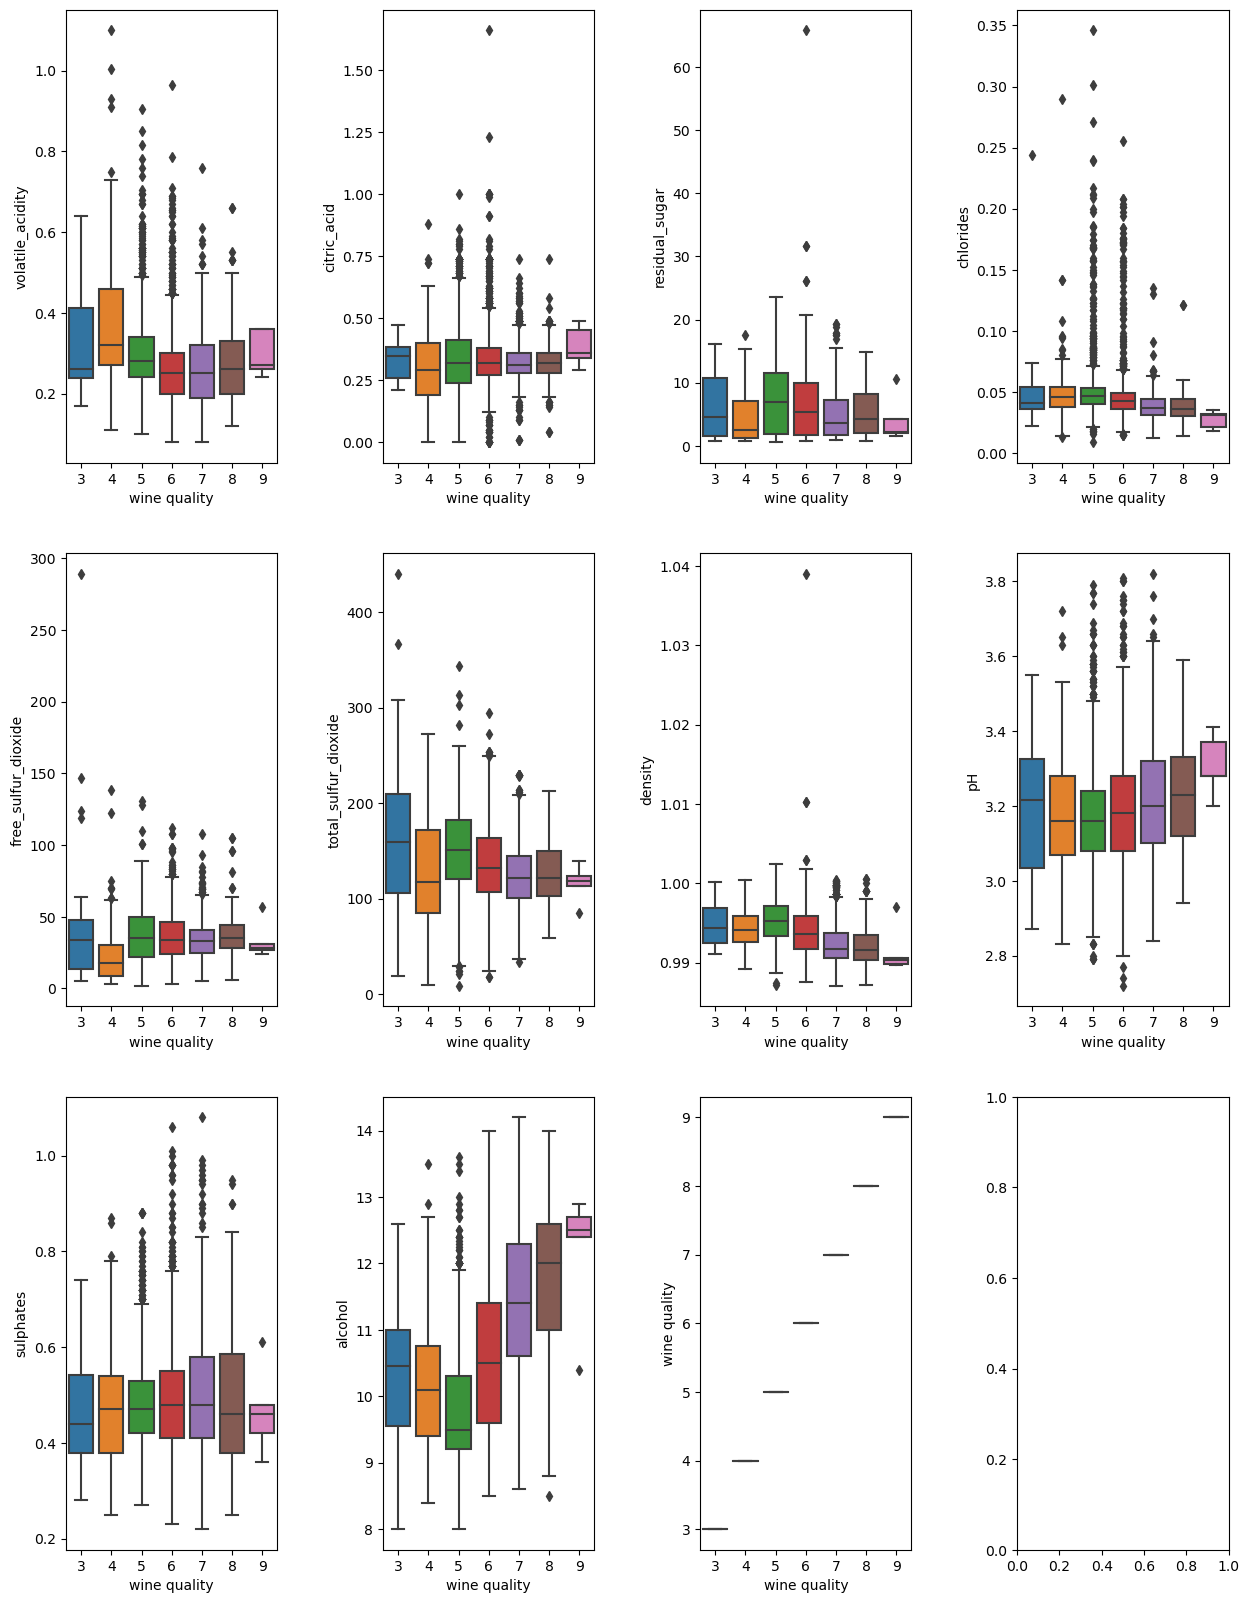

In [38]:
fig , axes = plt.subplots(nrows= 3 , ncols = 4, figsize = ( 15,20))
fig.subplots_adjust( hspace = .2 , wspace = .5)
axes = axes.ravel()
for i , col in enumerate( df.columns[1:]):
    _=sns.boxplot( y = col , x = 'wine quality' , data = df , ax = axes[i])

<AxesSubplot:title={'center':'Wine quality feature correlation'}>

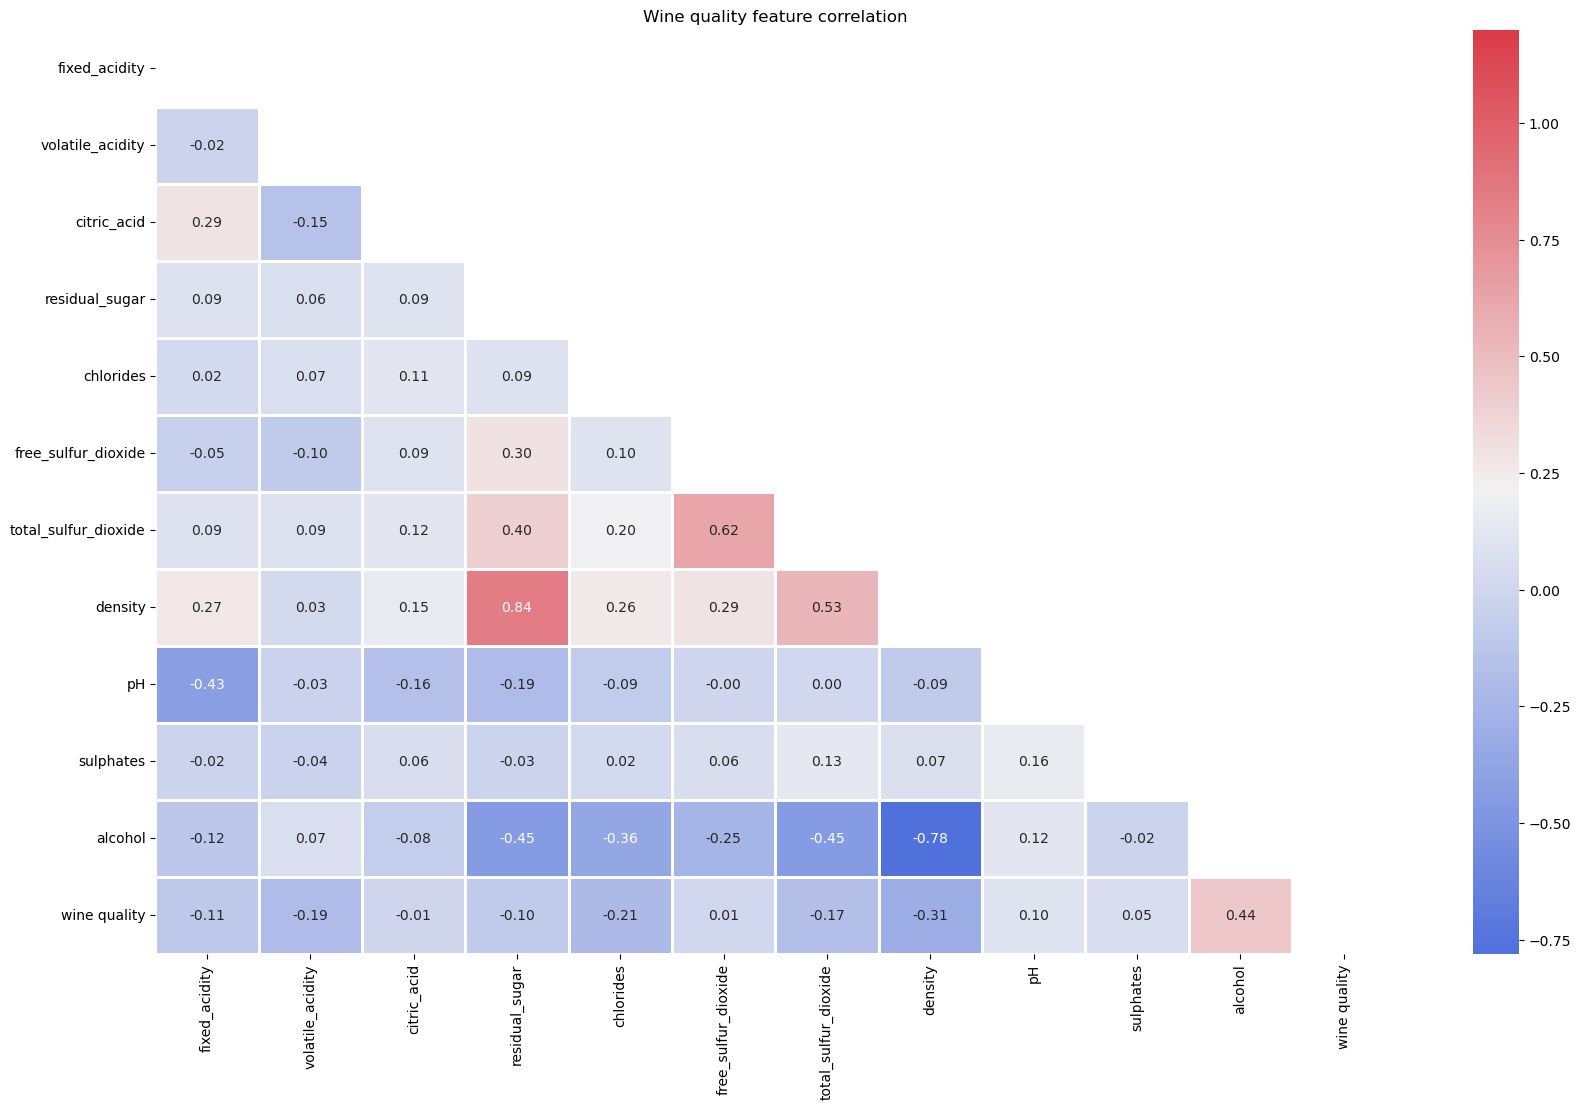

In [49]:
corrMatt = df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True

fig , ax = plt.subplots(figsize = (20, 12))
plt.title('Wine quality feature correlation')
cmap = sns.diverging_palette( 260, 10 , as_cmap = True)
sns.heatmap(corrMatt , vmax = 1.2 , square = False ,cmap = cmap , mask = mask , ax = ax , annot = True, fmt =".2f" , linewidth = 1)

<AxesSubplot:>

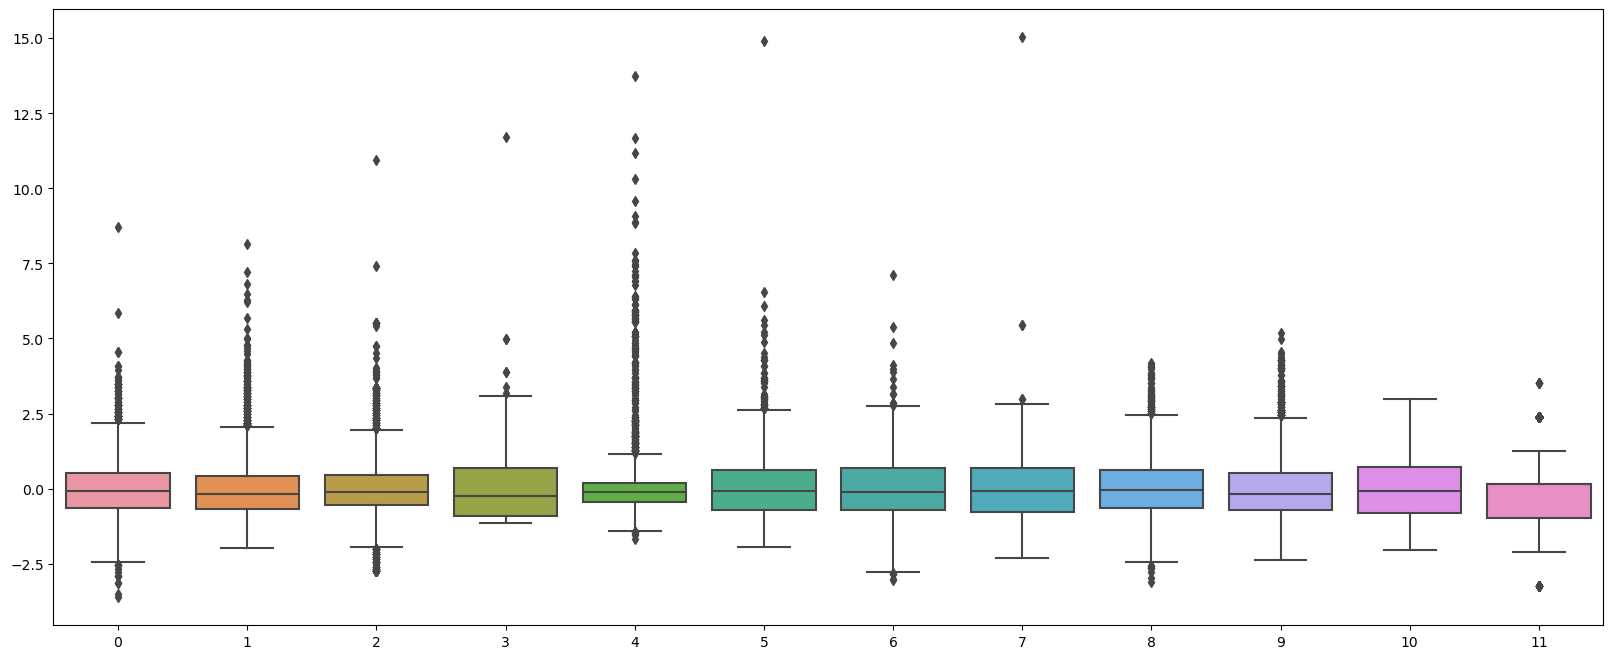

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
fig , ax = plt.subplots(figsize = (20, 8))
sns.boxplot( data = Xs, ax = ax)

In [65]:
from sklearn.decomposition import PCA 

feature_names = list(X.columns)
pca = PCA(n_components = 10)
Xs_pca = pca.fit_transform(Xs)
PCA_df=  pd.DataFrame()
PCA_df['PCA_1'] = Xs_pca[:,0]
PCA_df['PCA_2'] = Xs_pca[:,1]
PCA_df

PCA_1     PCA_2
0     3.543318 -0.355087
1    -0.612800  0.289411
2     0.142394 -1.168021
3     1.379525  0.199587
4     1.379525  0.199587
...        ...       ...
4893 -2.075943  0.322175
4894  1.479426  0.406234
4895 -0.751632 -0.511206
4896 -3.622997  0.939777
4897 -2.795046 -0.184072

[4898 rows x 2 columns]

<AxesSubplot:xlabel='PCA_1', ylabel='PCA_2'>

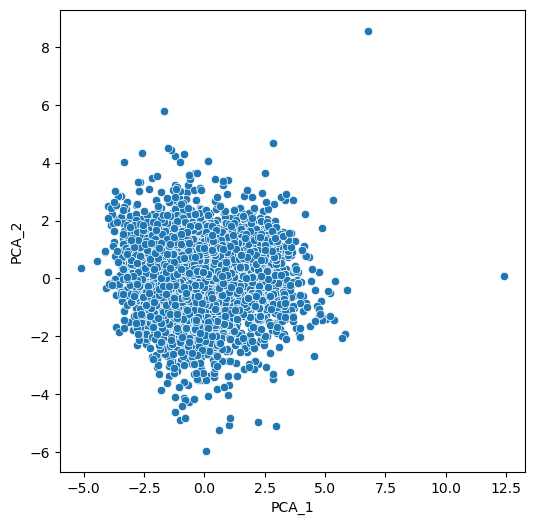

In [76]:
plt.figure(figsize=(6,6)) 
sns.scatterplot( x = PCA_df['PCA_1'] , y = PCA_df['PCA_2'] )

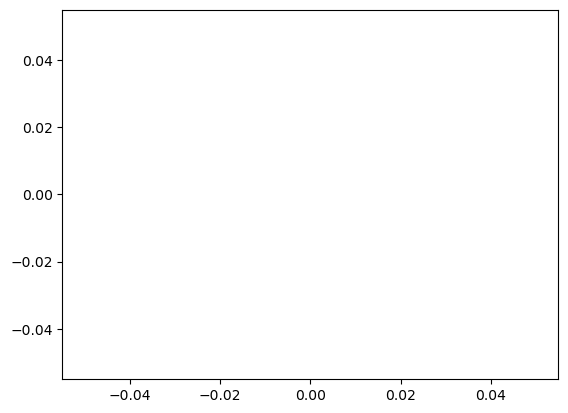

In [81]:
plt.plot(PCA_df['PCA_1'][df['wine quality'] == '3'])

In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
Xs_train , Xs_test , y_train , y_test = train_test_split( Xs , y , test_size = 0.2 , random_state = 42)
log_reg = LogisticRegression()
log_reg = LogisticRegression ( max_iter = 1000)
y_train = y_train.values.ravel()
log_reg.fit(Xs_train ,y_train)

classifier_score = log_reg.score(Xs_test , y_test)
print('The classifier accuracy score is {:03.2F}'.format(classifier_score))

The classifier accuracy score is 0.99


In [107]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
y_pred = log_reg.predict(Xs_test)
accuracy = accuracy_score(y_test , y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 99.39%
